In [21]:
## Importing necessary libraries for data manipulation, visualization and machine learning operqation for the dataset.
import pandas as pdas
import numpy as npy
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as mplt
import seaborn as sns

In [22]:
## Loading the California Housing dataset
california = fetch_california_housing()
## Creating a DataFrame using the dataset for easier data manipulation
data = pdas.DataFrame(california.data, columns=california.feature_names)
# Display the first few rows of the dataset to understand its structure and contents
print(data.head())
## Adding the target variable 'MedHouseVal' (median house value) to the DataFrame
data['MedHouseVal'] = california.target

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


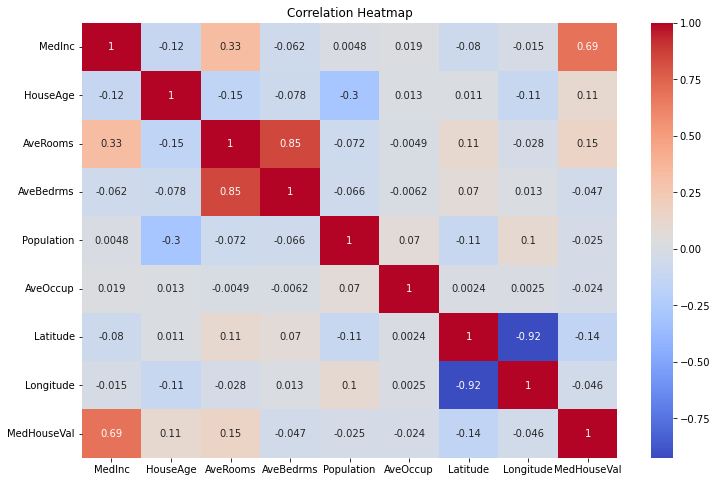

In [23]:
## Performing Exploratory Data Analysis to extact valuable insights before applying any machine learning model
## Creating a correlation heatmap to visualize the relationships between features of the dataset 
mplt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
mplt.title('Correlation Heatmap')
mplt.show()

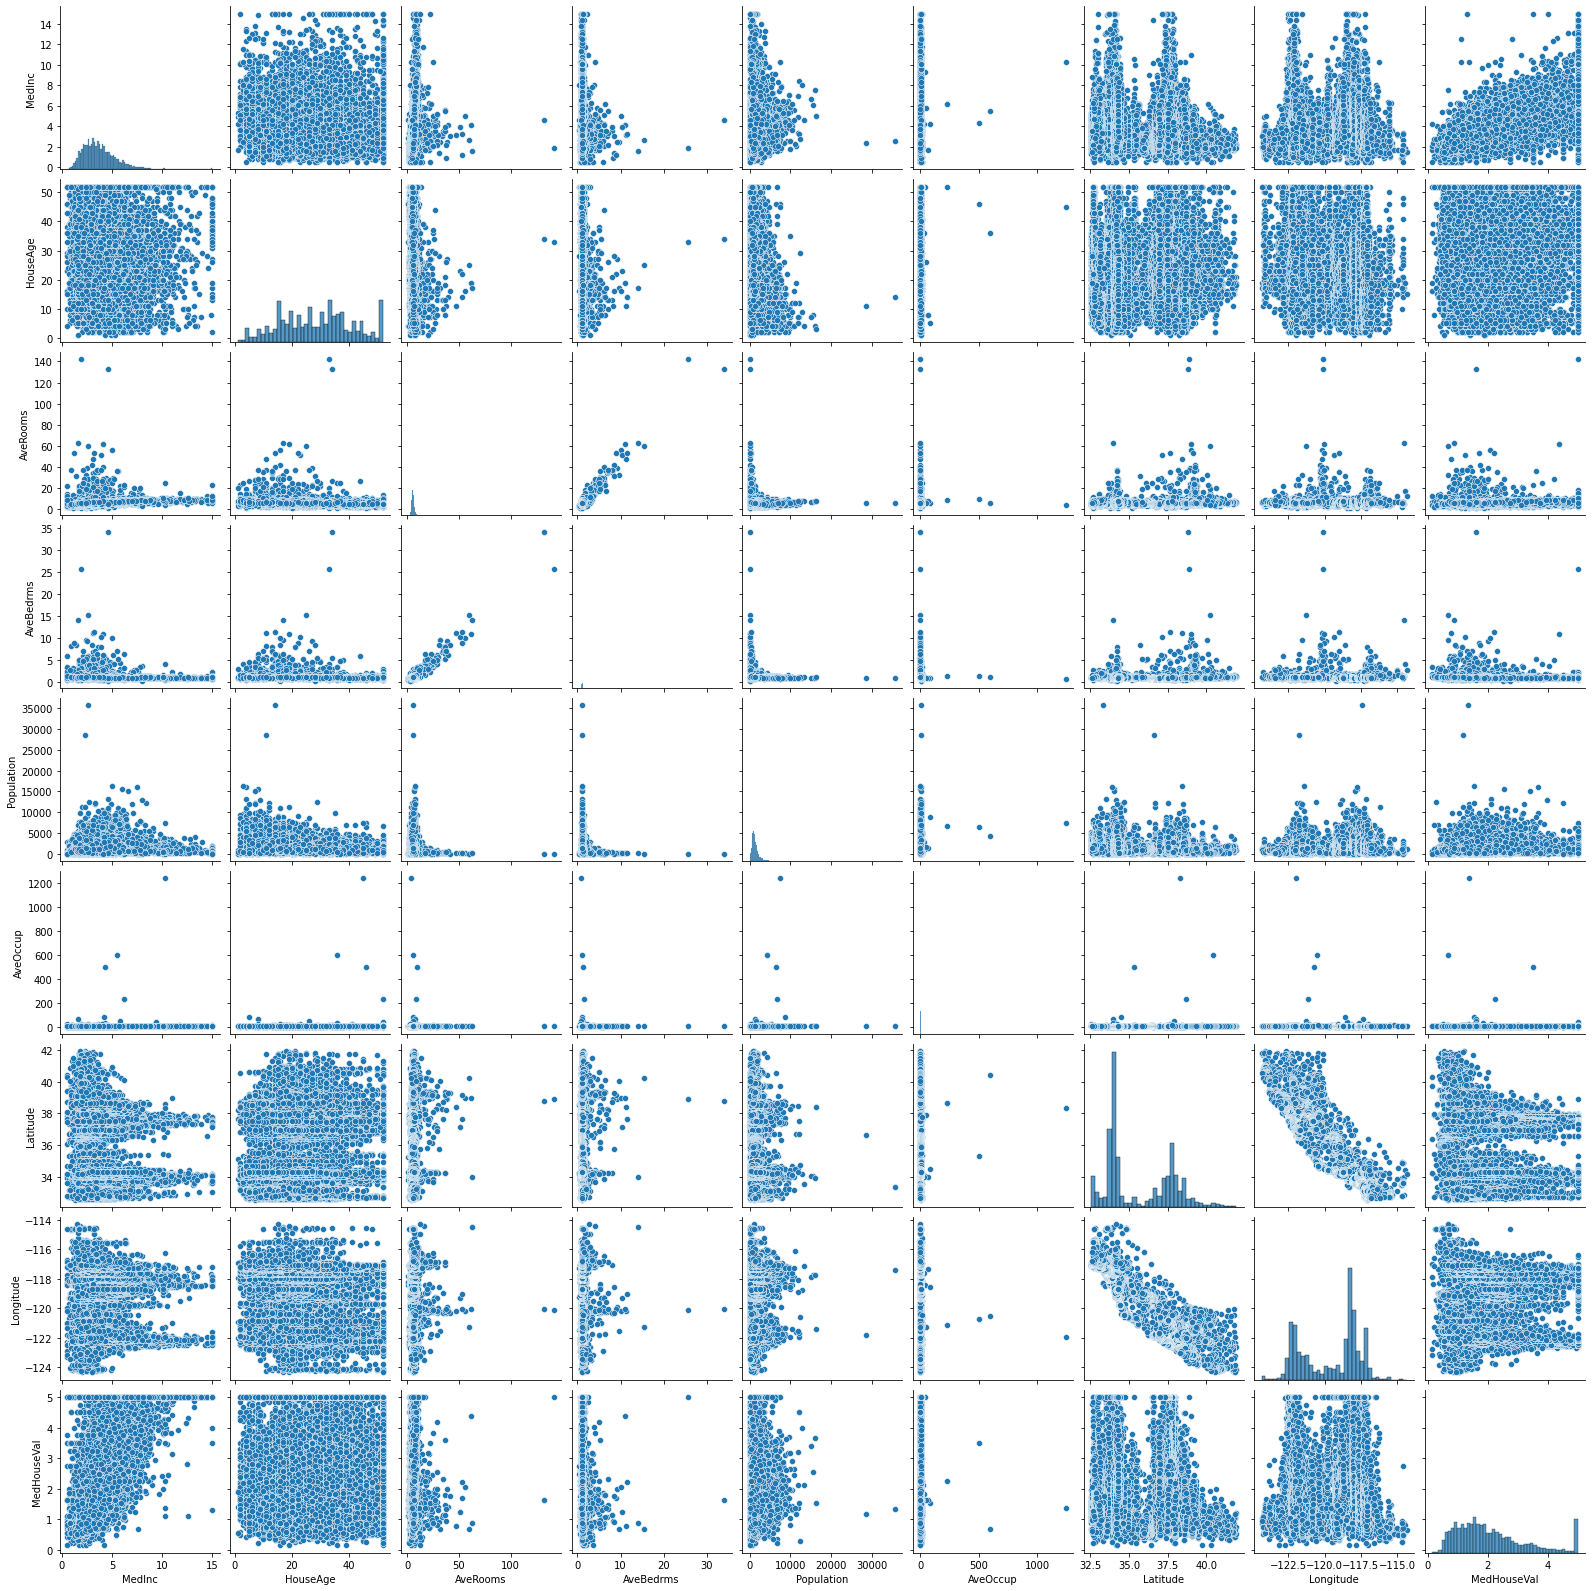

In [24]:
## Creating pair plots to observe the distribution and relationships of the features and target variable
sns.pairplot(data)
mplt.show()

In [25]:
## Checking for missing values in the dataset
print(data.isnull().sum())  # Ensuring there are no missing values in this dataset by counting the missing values for each column

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [26]:
## Normalizing the feature values using StandardScaler for better model performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('MedHouseVal', axis=1))

In [27]:
## For easier manipulation , we are Converting the scaled features back to a DataFrame
data_scaled = pdas.DataFrame(scaled_features, columns=california.feature_names)
# Adding the target variable back to the scaled DataFrame
data_scaled['MedHouseVal'] = data['MedHouseVal'] 

In [28]:
## Splitting the dataset into training and testing sets (80% training, 20% testing)
X = data_scaled.drop('MedHouseVal', axis=1)
y = data_scaled['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
## Defining a function to evaluate multiple models by training them and calculating error metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    ## Training the model on the training dataset
    model.fit(X_train, y_train)
    ## Predicting the target variable for the testing dataset
    y_pred = model.predict(X_test)
    ## Calculating mean absolute error (MAE) and mean squared error (MSE)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    ## Printing the evaluated metrics for the model
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    return y_pred

In [30]:
# Listing of models to evaluate: Linear Regression, Ridge, Lasso, Decision Tree, Random Forest
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor()]

Model: LinearRegression
Mean Absolute Error: 0.5332001304956565
Mean Squared Error: 0.5558915986952442


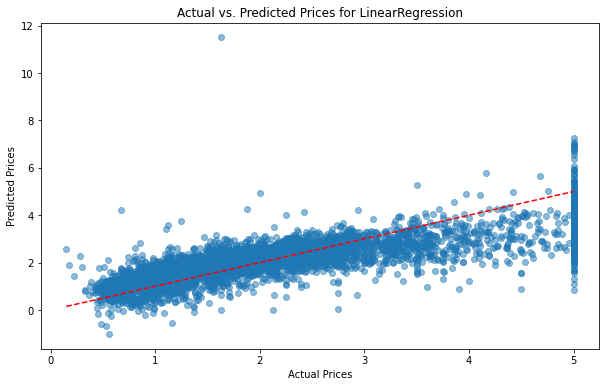

Model: Ridge
Mean Absolute Error: 0.5331933646313115
Mean Squared Error: 0.5558512007367507


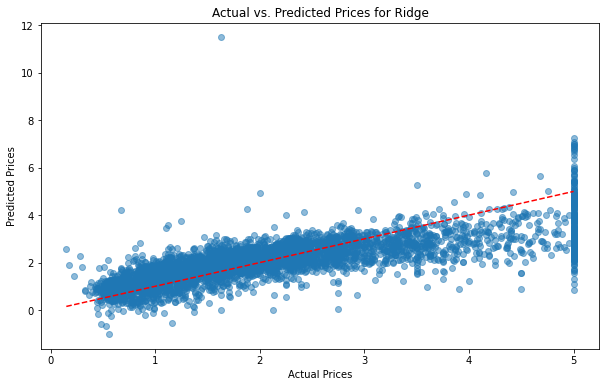

Model: Lasso
Mean Absolute Error: 0.9060685490007149
Mean Squared Error: 1.3106960720039365


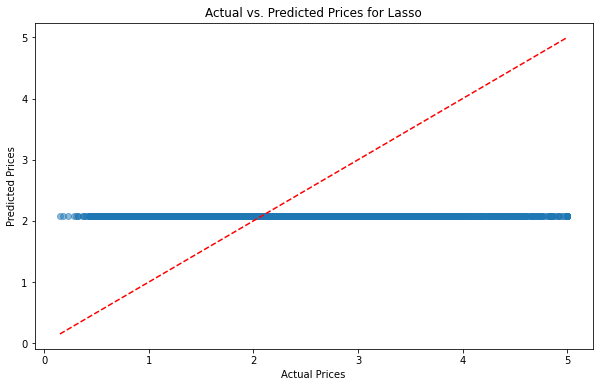

Model: DecisionTreeRegressor
Mean Absolute Error: 0.4518417272286822
Mean Squared Error: 0.4834038018014777


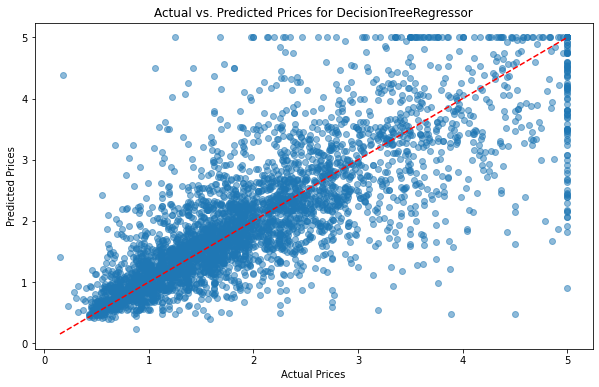

Model: RandomForestRegressor
Mean Absolute Error: 0.32709497417635675
Mean Squared Error: 0.2537384810922589


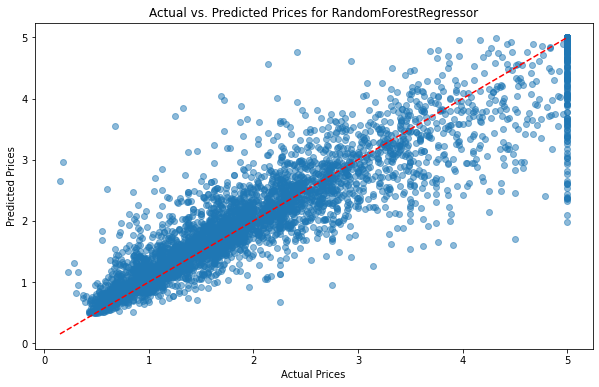

In [31]:
## Looping through each model,evaluating it,and visualizing its performance
for model in models:
    y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    # Plotting actual vs. predicted prices to visualize the model's performance
    mplt.figure(figsize=(10, 6))
    mplt.scatter(y_test, y_pred, alpha=0.5)
    mplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    mplt.xlabel("Actual Prices")
    mplt.ylabel("Predicted Prices")
    mplt.title(f"Actual vs. Predicted Prices for {model.__class__.__name__}")
    mplt.show()

In [32]:
## Performing cross-validation to ensure model robustness and avoid overfitting
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model.__class__.__name__}")
    print(f"Cross-Validation MSE: {-scores.mean()}")

Model: LinearRegression
Cross-Validation MSE: 0.558290171768655
Model: Ridge
Cross-Validation MSE: 0.55828240808882
Model: Lasso
Cross-Validation MSE: 1.3702550894247665
Model: DecisionTreeRegressor
Cross-Validation MSE: 0.8284885888783139
Model: RandomForestRegressor
Cross-Validation MSE: 0.42928865968812974


In [34]:
## Performing Feature importance analysis using the Random Forest model to identify the most influential features present 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = npy.argsort(importances)[::-1]

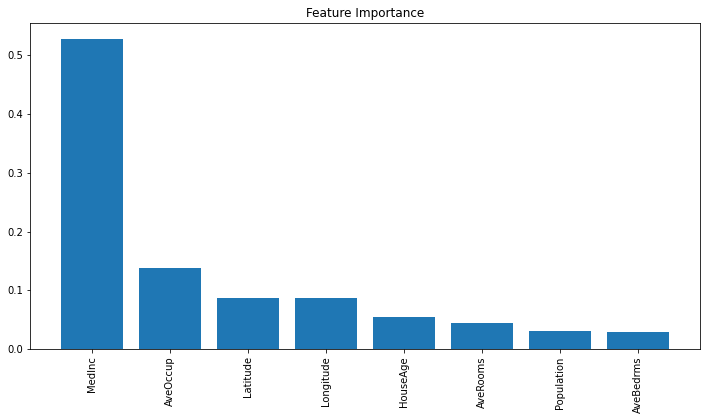

In [35]:
## Plotting the feature importances for better interpretability
mplt.figure(figsize=(12, 6))
mplt.title("Feature Importance")
mplt.bar(range(X.shape[1]), importances[indices], align='center')
mplt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
mplt.show()

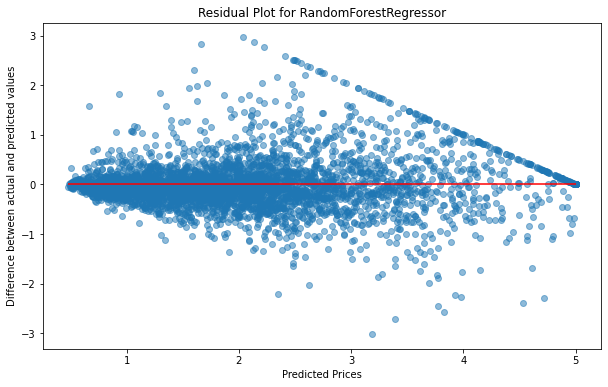

In [37]:
## Analyzing the differences between actual and predicted values for the best model
y_pred = rf_model.predict(X_test)
diff = y_test - y_pred
## Plottingl residuals to check for patterns that might indicate issues with the model
mplt.figure(figsize=(10, 6))
mplt.scatter(y_pred, diff, alpha=0.5)
mplt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r')
mplt.xlabel("Predicted Prices")
mplt.ylabel("Difference between actual and predicted values")
mplt.title("Residual Plot for RandomForestRegressor")
mplt.show()